# Data exploration

In [2]:
from plants_sm.data_structures.dataset import PandasDataset
from plants_sm.unsupervised.pca import SklearnPCA
from sklearn.preprocessing import StandardScaler
from plants_sm.unsupervised.tsne import SklearnTSNE
import numpy as np
from plants_sm.data_exploration.boxplot import Boxplot

In [3]:
dataset = PandasDataset(labels_field=["union class", "Aracyc class"], representation_field="sequence_test",
                        instances_ids_field="gene")

In [4]:
dataset.from_csv("../data/dados.csv")

In [5]:
dataset.instances

array(['MDMSSMAGSIGVSVAVLRFLLCFVATIPVSFACRIVPSRLGKHLYAAASGAFLSYLSFGFSSNLHFLVPMTIGYASMAIYRPKCGIITFFLGFAYLIGCHVFYMSGDAWKEGGIDSTGALMVLTLKVISCSMNYNDGMLKEEGLREAQKKNRLIQMPSLIEYFGYCLCCGSHFAGPVYEMKDYLEWTEGKGIWDTTEKRKKPSPYGATIRAILQAAICMALYLYLVPQYPLTRFTEPVYQEWGFLRKFSYQYMAGFTARWKYYFIWSISEASIIISGLGFSGWTDDASPKPKWDRAKNVDILGVELAKSAVQIPLVWNIQVSTWLRHYVYERLVQNGKKAGFFQLLATQTVSAVWHGLYPGYMMFFVQSALMIAGSRVIYRWQQAISPKMAMLRNIMVFINFLYTVLVLNYSAVGFMVLSLHETLTAYGSVYYIGTIIPVGLILLSYVVPAKPSRPKPRKEE',
       'MMKVVSPRTRSDSITEKVFRRVYSNFNISTVEDEYIHRQRSSDYEKESRLRKRGLEDKEEVMEMEQMGAERIKTVLILMSDTGGGHRASAEAIRDAFKIEFGDDYRIIIKDVWKEYTGWPLNDMERQYKFMVKHVGLWSVAFHGTSPKWIHKSYLSALAAYYAKEIEAGLMEYKPDIIISVHPLMQHIPLWVMKWQGLHKKVIFVTVITDLNTCHRTWFHHGVSRCYCPSKEVAKRALVDGLDDSQIRVFGLPVRPSFPRTILNKNELRKELEIDLNLPAVLLMGGGEGMGPVQKTALALGDSLYNSKESNPIGQLIVICGRNKVLASTLASHEWKIPVKVRGFETQMEKWMGACDCIITKAGPGTIAEALICGLPIILNDYIPGQEKGNVPYVVDNGAGVFTRSPKETAKIVADWFSNNKEELKKMSENALKLSQPEAVFDIVKDIHHLSQQQQRIPLFNEFSY',
       'MATKRSVGTLKEADLKGKSVFVRVDLNVPLDDNSNITDDTRIR

In [6]:
wrapper = PropythiaWrapper(descriptor="get_all", n_jobs=8, tricomp=True)
wrapper.featurize(dataset)

In [7]:
dataset.to_csv("../data/dados_propythia_tricomp.csv")

True

In [5]:
dataset2 = PandasDataset(labels_field=["union class", "Aracyc class"],
                         representation_field="sequence_test",
                         instances_ids_field="gene")

In [6]:
dataset2.from_csv("../data/dados.csv")
wrapper = PropythiaWrapper(descriptor="get_all", n_jobs=8, tricomp=False)
wrapper.featurize(dataset2)
dataset2.to_csv("../data/dados_propythia.csv")

True

/home/joao/anaconda3/envs/PlantsSM/lib/python3.7/site-packages/dask/core.py:119: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


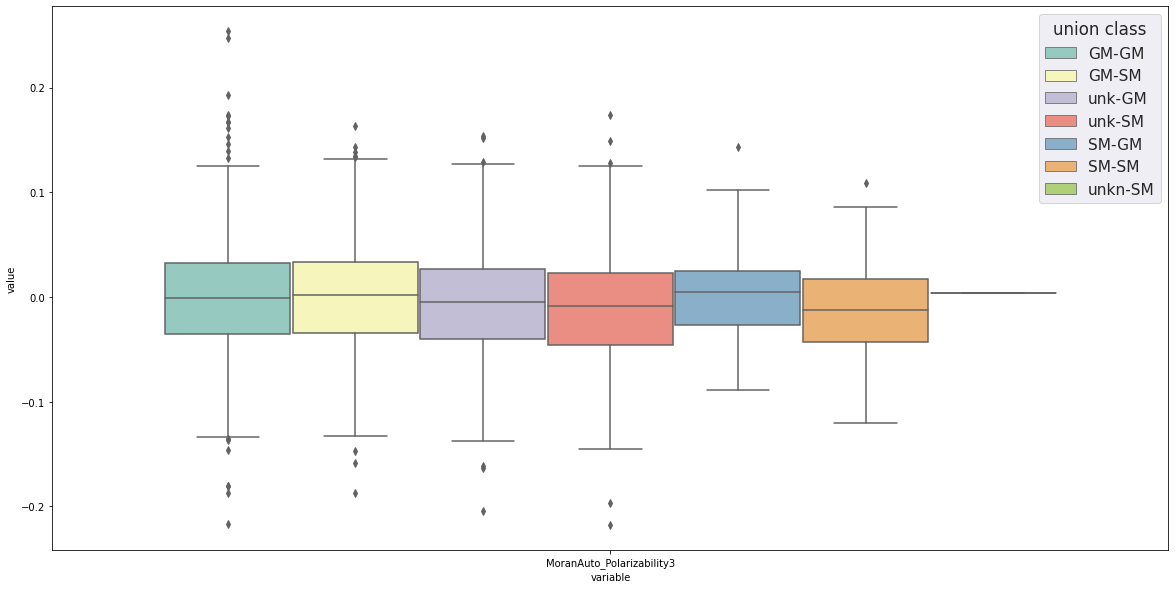

In [40]:
dataset2 = PandasDataset(labels_field=["union class", "Aracyc class"],
                         representation_field="sequence_test",
                         instances_ids_field="gene", features_fields=slice(8, None))

dataset2.from_csv("../data/dados_propythia.csv")

boxplot = Boxplot(title=("", 25), orientation="v", pallete="Set3")
boxplot.generate(features_name=["MoranAuto_Polarizability3"], dataframe=dataset2.dataframe, label_name="union class")

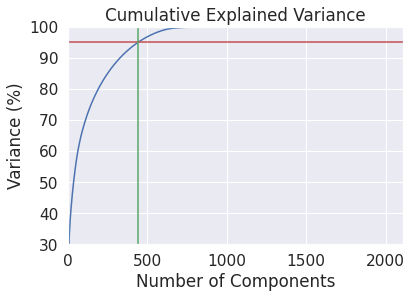

First 2 PC: 15.913049253598418
First 442 PC: 95.01267552998772


In [9]:
#scale of the data
scaler = StandardScaler()
data = scaler.fit_transform(np.array(dataset2.features))

# Load Data
pca = SklearnPCA(n_components = 2107)

# Transform the data
df_pca = pca.fit_transform(data)

pca.generate_pca_variance_plot()

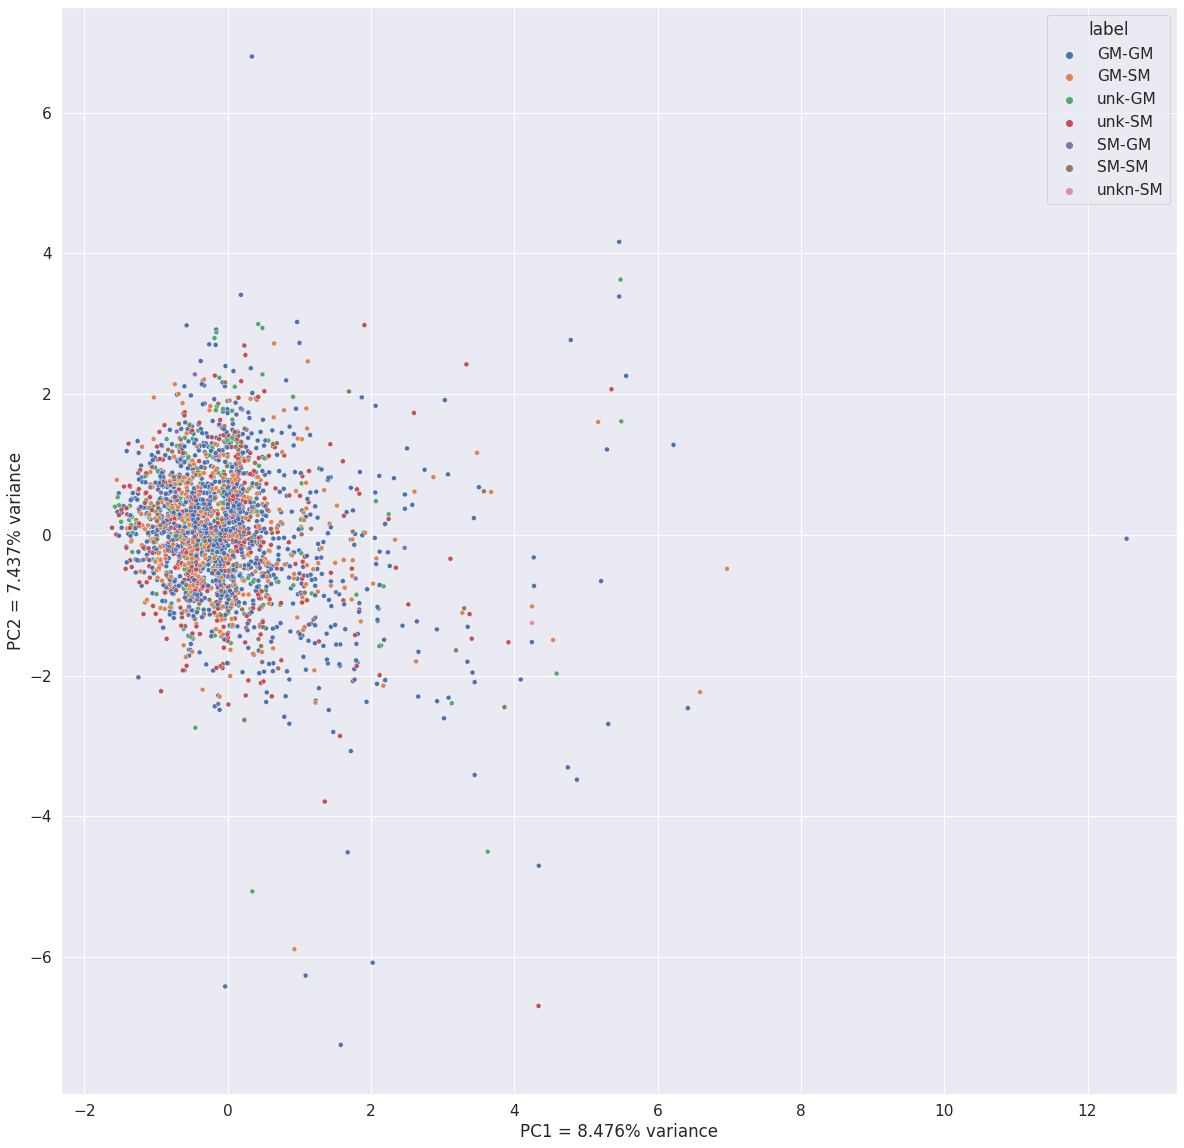

In [10]:
pca.generate_dotplot(data, dataset2.labels[:, 0])

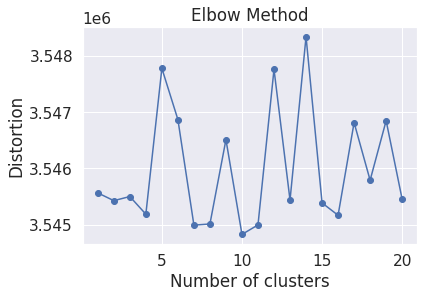

In [11]:
from plants_sm.unsupervised.kmeans import SklearnKMeans

kmeans = SklearnKMeans(n_clusters=5)

kmeans.generate_distortion_graph(df_pca)

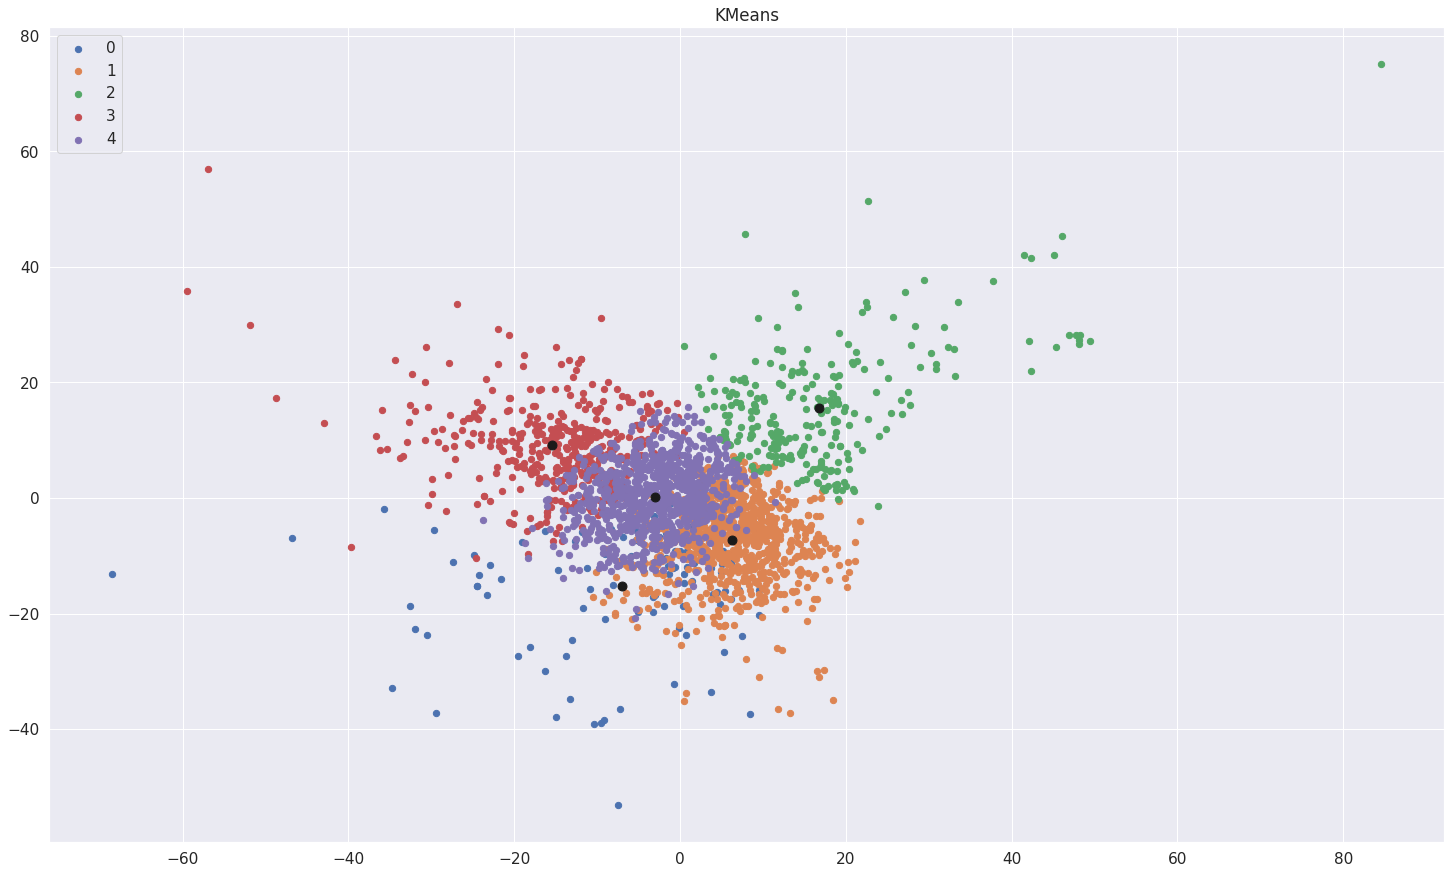

In [12]:
descriptors_kmeans = kmeans.fit_transform(df_pca)
kmeans.fit_predict_generate_scatter_plot(df_pca)

/home/joao/anaconda3/envs/PlantsSM/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/joao/anaconda3/envs/PlantsSM/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/joao/anaconda3/envs/PlantsSM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'TSNE'}, xlabel='t-SNE 1', ylabel='t-SNE 2'>

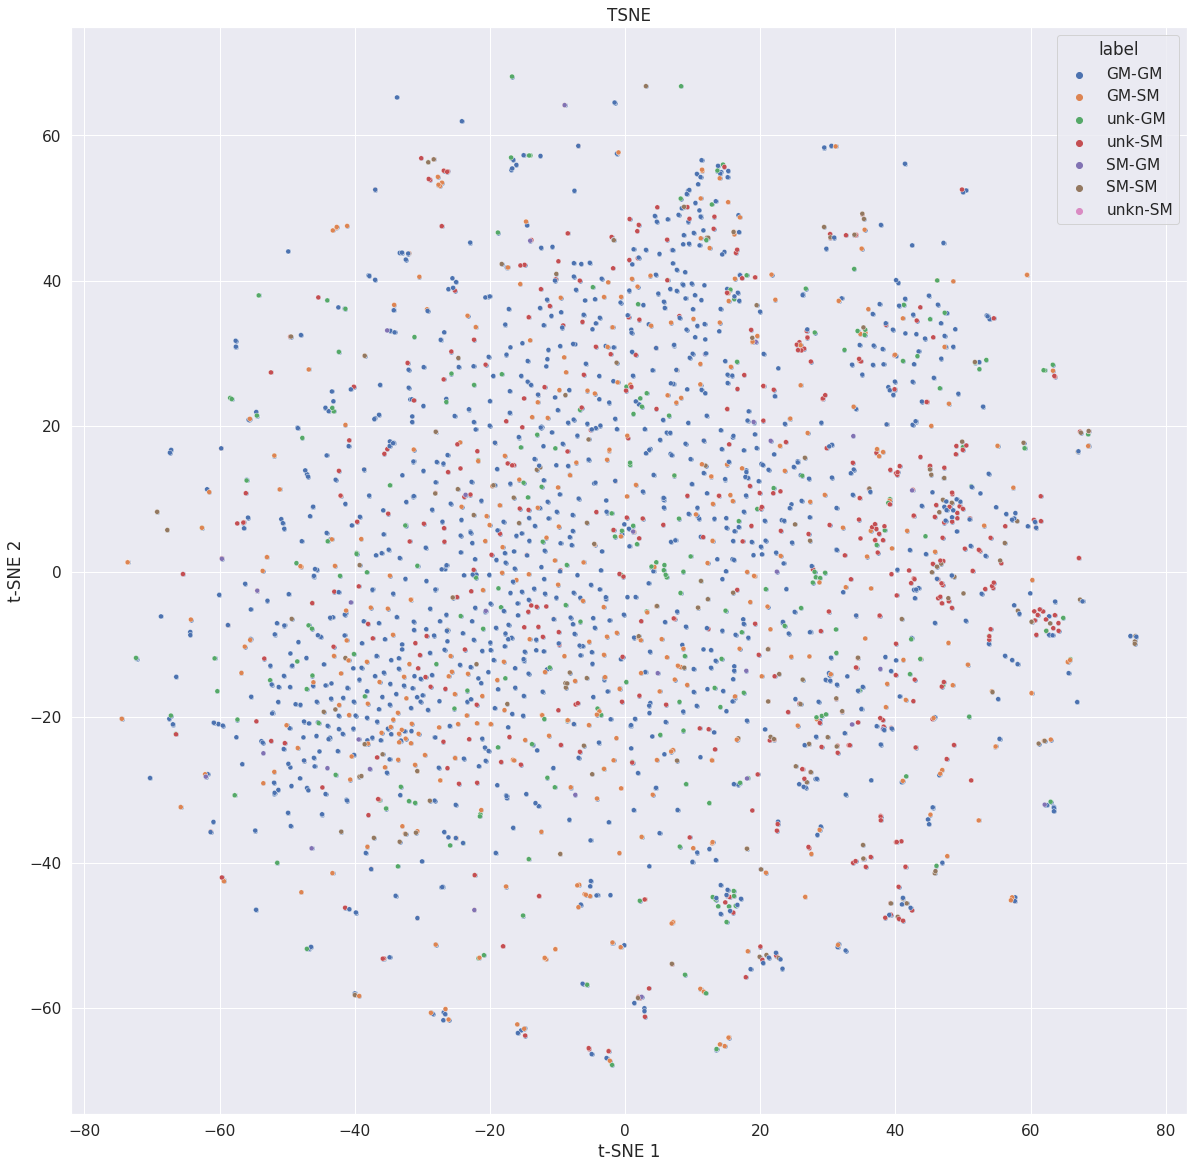

In [14]:
scaler = StandardScaler()
data = scaler.fit_transform(dataset2.features)

tsne = SklearnTSNE()
tsne_data = tsne.fit_transform(data)
tsne.generate_dotplot(tsne_data, dataset2.labels[:, 0])

# Train dataset

In [3]:
dataset2 = PandasDataset(labels_field=["class"],
                         representation_field="sequence_test",
                         instances_ids_field="gene", features_fields=slice(8, -1))

In [6]:
dataset2.from_csv("../data/moore_2019/train_set.tsv")


/home/joao/Desktop/PlantsSM/src/plants_sm/io/csv.py:59: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(self.buffer, **self.kwargs)


In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile, chi2
import pandas as pd

df = pd.read_csv("../data/moore_2019/train_set.tsv")
X = df.iloc[:, slice(8, -1)]
y = df.iloc[:, -1]

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(X)
feature_selection_method = SelectPercentile(chi2, percentile=25)

feature_selection_method.fit(data, y)

/tmp/ipykernel_32345/2255578272.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/moore_2019/train_set.tsv")


SelectPercentile(percentile=25, score_func=<function chi2 at 0x7ff38c889700>)

In [28]:
data.shape

(1630, 2107)

In [24]:
X.columns

Index(['length', 'charge', 'charge_density', 'formulaC', 'formulaH',
       'formulaN', 'formulaO', 'formulaS', 'total_bonds', 'hydrogen_bonds',
       ...
       'crosscorr_6', 'moment', 'global', 'profile_0', 'profile_1', 'arc_0',
       'arc_1', 'arc_2', 'arc_3', 'arc_4'],
      dtype='object', length=2107)

In [32]:
selected_features = X.columns[feature_selection_method.get_support()]
selected_features.shape

(526,)

In [9]:
dataset2.features


array([[ 4.62000000e+02,  1.60790000e+01,  3.08310678e-04, ...,
         4.00000000e+01,  4.00000000e+01,  4.00000000e+01],
       [ 4.65000000e+02,  4.94800000e+00,  9.33764435e-05, ...,
         6.00000000e+01,  8.00000000e+01,  2.00000000e+01],
       [ 8.14000000e+02, -5.45800000e+00, -5.84827028e-05, ...,
         8.00000000e+01,  6.00000000e+01,  4.00000000e+01],
       ...,
       [ 2.54000000e+02, -4.26200000e+00, -1.49256711e-04, ...,
         4.00000000e+01,  6.00000000e+01,  2.00000000e+01],
       [ 5.88000000e+02,  5.41800000e+00,  8.22925383e-05, ...,
         6.00000000e+01,  6.00000000e+01,  4.00000000e+01],
       [ 5.82000000e+02,  8.51200000e+00,  1.27581360e-04, ...,
         8.00000000e+01,  8.00000000e+01,  4.00000000e+01]])

In [45]:
from collections import Counter

Counter(dataset2.labels[:, 0])

Counter({'GM': 1457, 'SM': 173})

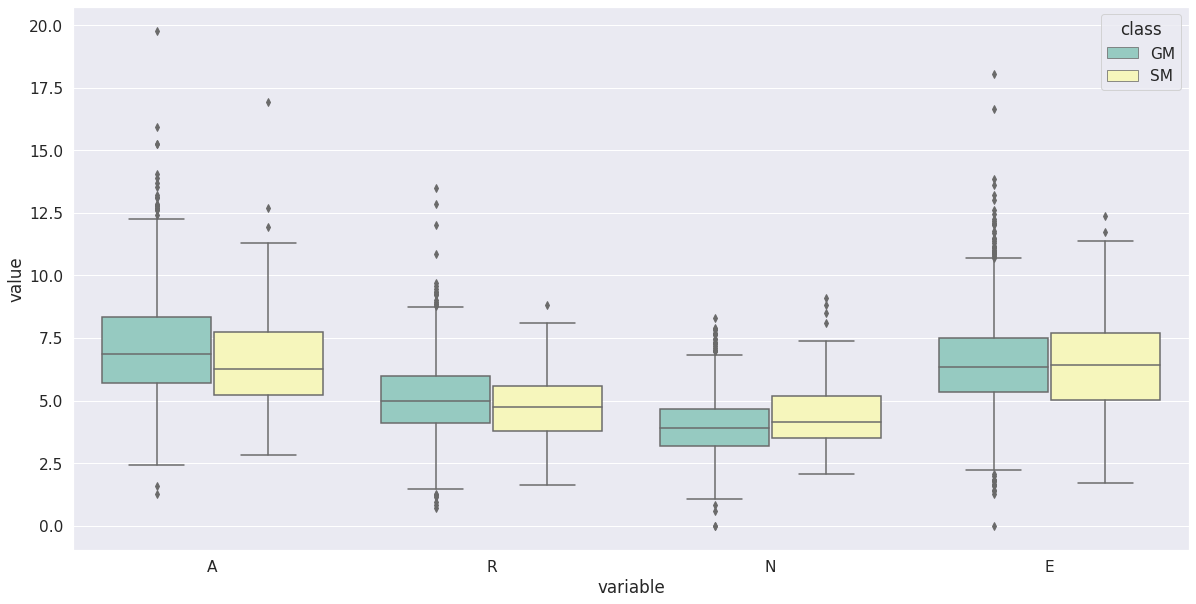

In [24]:
boxplot = Boxplot(title=("", 25), orientation="v", pallete="Set3")
boxplot.generate(features_name=["A", "R", "N", "E"], dataframe=dataset2.dataframe, label_name="class")

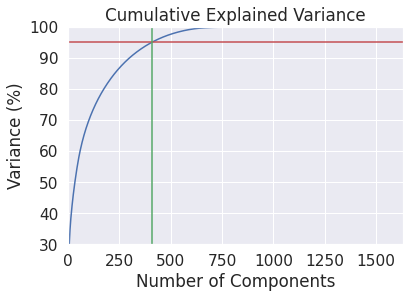

First 2 PC: 16.122287271984188
First 409 PC: 95.0103407230085


In [26]:
#scale of the data
scaler = StandardScaler()
data = scaler.fit_transform(np.array(dataset2.features))

# Load Data
pca = SklearnPCA(n_components = 1630)

# Transform the data
df_pca = pca.fit_transform(data)

pca.generate_pca_variance_plot()

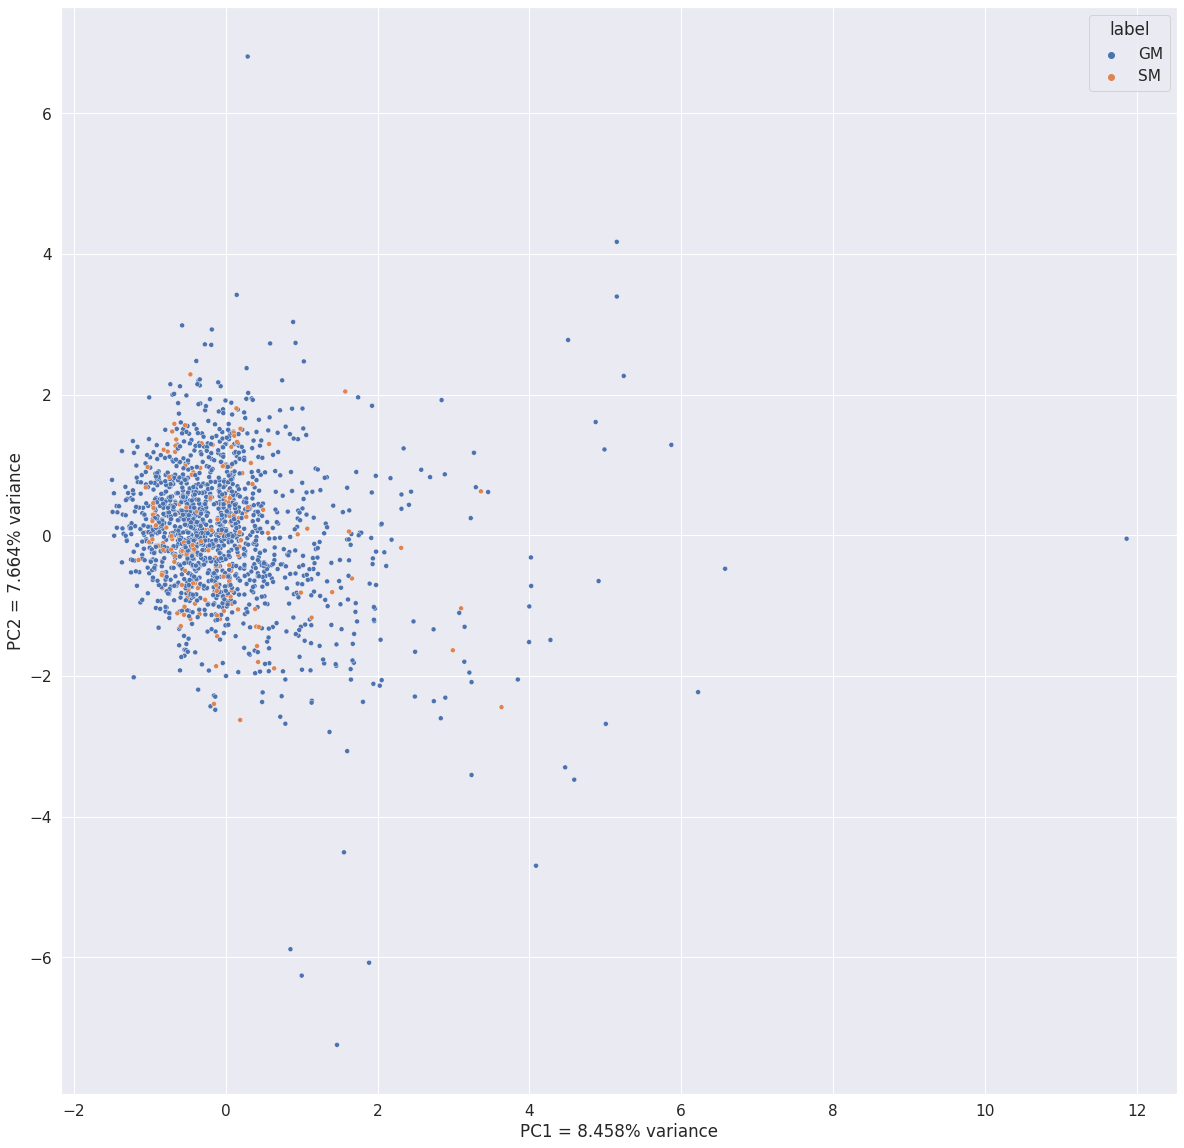

In [27]:
pca.generate_dotplot(data, dataset2.labels[:, 0])

/home/joao/anaconda3/envs/PlantsSM/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/joao/anaconda3/envs/PlantsSM/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/joao/anaconda3/envs/PlantsSM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'TSNE'}, xlabel='t-SNE 1', ylabel='t-SNE 2'>

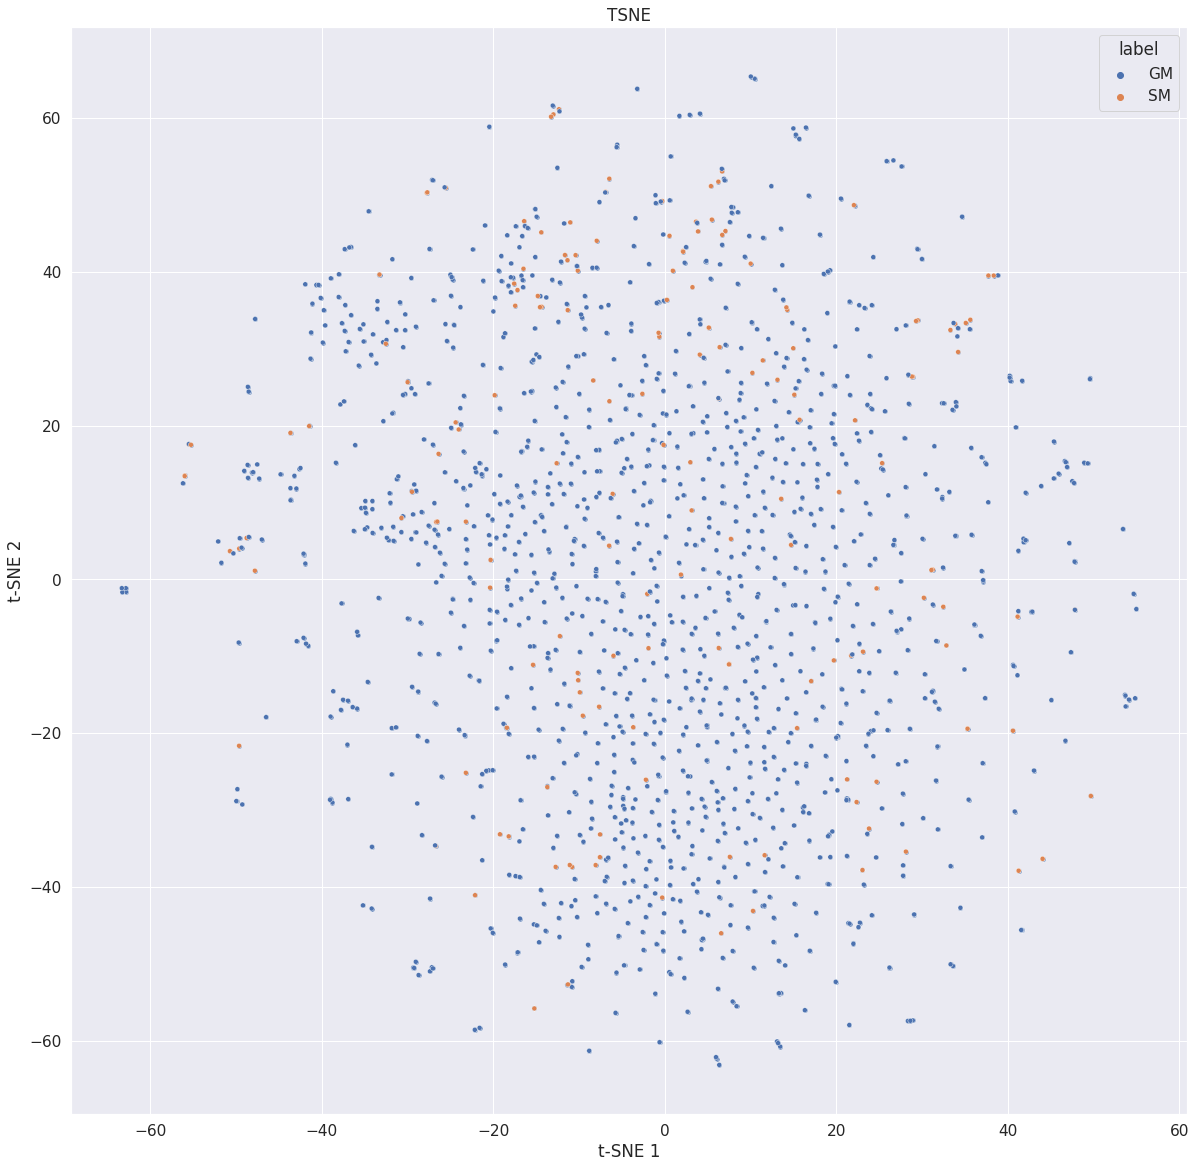

In [28]:
scaler = StandardScaler()
data = scaler.fit_transform(dataset2.features)

tsne = SklearnTSNE()
tsne_data = tsne.fit_transform(data)
tsne.generate_dotplot(tsne_data, dataset2.labels[:, 0])

In [3]:
dataset2 = PandasDataset(labels_field=["class"],
                         representation_field="sequence_test",
                         instances_ids_field="gene", features_fields=slice(8, -1))
dataset2.from_csv("../data/test_set.tsv")

In [5]:
from collections import Counter

Counter(dataset2.labels[:, 0])

Counter({'GM': 162, 'SM': 20})